# Data Science Lab-7
### Karthik Bommaraju
### 207166
### Section-B

## Q1-1. Principal Component Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [15]:
class PrincipalComponentAnalysis:
    def __init__(self, n_components):
        self.cov_ = None
        self.values_ = None
        self.vectors_ = None
        self.n_features_ = None
        self.n_samples_ = None
        self.final_data_ = None
        self.mean_ = None
        self.std_ = None
        self.ev=None
        self.n_components_ = n_components

    def normalize(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.n_samples_ = X.shape[0]
        self.n_features_ = X.shape[1]
        X_norm = self.normalize(X)
        self.cov_ = np.cov(X_norm.T)
        self.ev = np.linalg.eig(self.cov_)
        topEig = self.ev[1][:,0:self.n_components_]
        self.final_data_ = X_norm @ topEig
#         self.values_, self.vectors_ = np.linalg.eig(self.cov_)
#         combined = dict(zip(self.values_, self.vectors_.T))
#         self.values_ = np.sort(self.values_)[::-1]
#         combined = {i: combined[i] for i in self.values_}
#         row_feature_vector = np.array(list(combined.values())[:self.n_components_])
#         self.final_data_ = (row_feature_vector @ X_norm.T).T
        return self.final_data_

    def plot(self, y):
        df = pd.DataFrame(np.hstack( ( self.final_data_, y.reshape(-1, 1)) ) )
        class_0 = df[df[2] == 0].values
        class_1 = df[df[2] == 1].values
        class_2 = df[df[2] == 2].values
        plt.scatter(x=class_0[:,0], y=class_0[:,1], color='red')
        plt.scatter(x=class_1[:,0], y=class_1[:,1], color='green')
        plt.scatter(x=class_2[:,0], y=class_2[:,1], color='blue')
        txt = "Red - Class 0\nGreen - Class 1\nBlue - Class 2"
        plt.figtext(0.4, -0.1, txt, wrap=True, horizontalalignment='left', fontsize=12)
        plt.show()

In [16]:
X, y = load_iris(return_X_y=True)

In [17]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
y[:5]

array([0, 0, 0, 0, 0])

In [22]:
pca = PrincipalComponentAnalysis(n_components=3)

In [23]:
X_reduced = pca.fit_transform(X)
X_reduced[:5]

array([[-2.26470281, -0.4800266 , -0.12770602],
       [-2.08096115,  0.67413356, -0.23460885],
       [-2.36422905,  0.34190802,  0.04420148],
       [-2.29938422,  0.59739451,  0.09129011],
       [-2.38984217, -0.64683538,  0.0157382 ]])

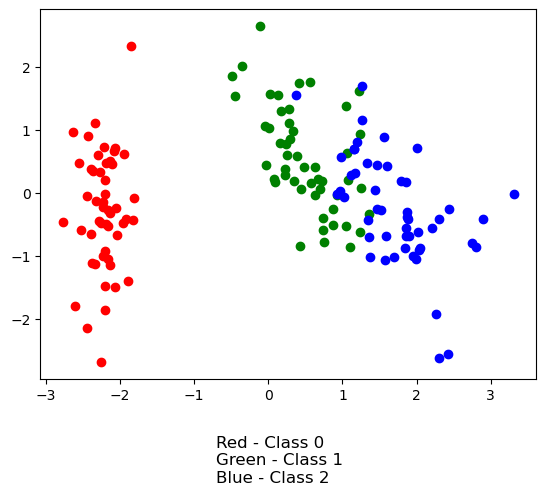

In [21]:
pca.plot(y)